In [256]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [257]:
def multiple_formatter(denominator=2, number=np.pi, latex="\pi"):
    def gcd(a, b):
        while b:
            a, b = b, a % b
        return a

    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den * x / number))
        com = gcd(num, den)
        (num, den) = (int(num / com), int(den / com))
        if den == 1:
            if num == 0:
                return r"$0$"
            if num == 1:
                return r"$%s$" % latex
            elif num == -1:
                return r"$-%s$" % latex
            else:
                return r"$%s%s$" % (num, latex)
        else:
            if num == 1:
                return r"$\frac{%s}{%s}$" % (latex, den)
            elif num == -1:
                return r"$\frac{-%s}{%s}$" % (latex, den)
            else:
                return r"$\frac{%s%s}{%s}$" % (num, latex, den)

    return _multiple_formatter


class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex="\pi"):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

## Exercise 1: Binary distribution

In [258]:
n = 1000  # half sample size
theta = np.linspace(0, np.pi, 2 * n)

plus = 1 / np.sqrt(2) * np.array([1, 1])
minus = 1 / np.sqrt(2) * np.array([1, -1])


def psi0(theta):
    return np.array([np.cos(theta / 2), np.sin(theta / 2)])


def psi1(theta):
    return np.array([np.cos(theta / 2), -np.sin(theta / 2)])


def scalarprod(v1, v2):
    return np.sum(v1 * v2)


def prob(v1, v2):
    return np.abs(scalarprod(v1, v2)) ** 2

### Mutal Information, I(X;B)

I_XB = H(B) + H(B|X) = H(B) + H(B|X=0)p(X=0) + H(B|X=1)p(X=1)

/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/3129572604.py:8: RuntimeWarning: divide by zero encountered in log2
  I_XB = -eigs_rhoB.T[0] * np.log2(eigs_rhoB.T[0]) - eigs_rhoB.T[1] * np.log2(eigs_rhoB.T[1])
/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/3129572604.py:8: RuntimeWarning: invalid value encountered in multiply
  I_XB = -eigs_rhoB.T[0] * np.log2(eigs_rhoB.T[0]) - eigs_rhoB.T[1] * np.log2(eigs_rhoB.T[1])


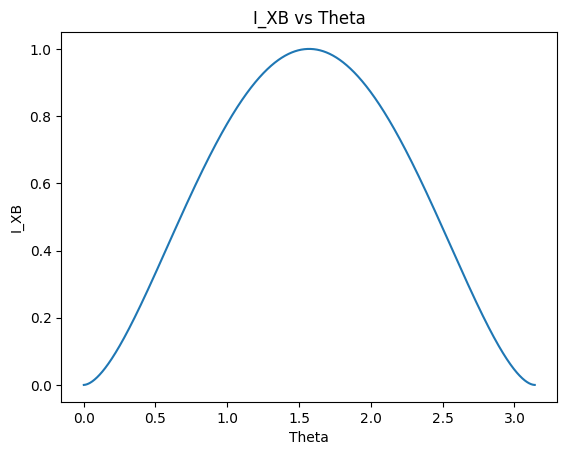

In [259]:
eigs_rhoB = []

for i in range(2 * n):
    eig = np.array([(np.cos(theta[i] / 2)) ** 2, (np.sin(theta[i] / 2)) ** 2])
    eigs_rhoB.append(eig)
eigs_rhoB = np.asarray(eigs_rhoB)

I_XB = -eigs_rhoB.T[0] * np.log2(eigs_rhoB.T[0]) - eigs_rhoB.T[1] * np.log2(eigs_rhoB.T[1])

plt.plot(theta, I_XB)
plt.xlabel("Theta")
plt.ylabel("I_XB")
plt.title("I_XB vs Theta")
plt.show()

### Accesslible Information I(X;B)

In [260]:
p00, p01, p10, p11 = [], [], [], []
pe = []

for i in range(n):
    p00_ = prob(plus, psi0(theta[i]))
    p01_ = prob(plus, psi1(theta[i]))
    p10_ = prob(minus, psi0(theta[i]))
    p11_ = prob(minus, psi1(theta[i]))
    p00.append(p00_), p01.append(p01_), p10.append(p10_), p11.append(p11_)
    pe_ = 0.5 * (1 - np.sin(theta[i]))
    pe.append(pe_)

p00, p01, p10, p11 = np.asarray(p00), np.asarray(p01), np.asarray(p10), np.asarray(p11)
pe = np.asarray(pe)

p_plus = p00 + p01
p_minus = p10 + p11

In [261]:
H_Y = -0.5 * p_plus * np.log2(0.5 * p_plus) - 0.5 * p_minus * np.log2(0.5 * p_minus)
H_Y_X = 0.5 * (
    -0.5 * p00 * np.log2(0.5 * p00)
    - 0.5 * p01 * np.log2(0.5 * p01)
    - 0.5 * p10 * np.log2(0.5 * p10)
    - 0.5 * p11 * np.log2(0.5 * p11)
)

/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/4192025925.py:18: RuntimeWarning: divide by zero encountered in log2
  I_XB = -eigs_rhoB.T[0] * np.log2(eigs_rhoB.T[0]) - eigs_rhoB.T[1] * np.log2(eigs_rhoB.T[1])
/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/4192025925.py:18: RuntimeWarning: invalid value encountered in multiply
  I_XB = -eigs_rhoB.T[0] * np.log2(eigs_rhoB.T[0]) - eigs_rhoB.T[1] * np.log2(eigs_rhoB.T[1])


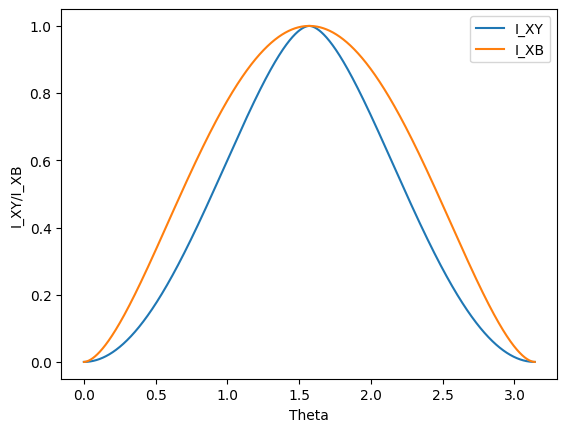

In [262]:
# n = 1000
# theta = np.linspace(0.001,np.pi,n)

eigs_rhoB = []

pe = []

for i in range(2 * n):
    pe_ = 0.5 * (1 - np.sin(theta[i]))
    pe.append(pe_)
pe = np.asarray(pe)

for i in range(2 * n):
    eig = np.array([(np.cos(theta[i] / 2)) ** 2, (np.sin(theta[i] / 2)) ** 2])
    eigs_rhoB.append(eig)
eigs_rhoB = np.asarray(eigs_rhoB)

I_XB = -eigs_rhoB.T[0] * np.log2(eigs_rhoB.T[0]) - eigs_rhoB.T[1] * np.log2(eigs_rhoB.T[1])


I_XY = 1 + (1 - pe) * np.log2(1 - pe) + pe * np.log2(pe)

plt.plot(theta, I_XY, label="I_XY")
plt.plot(theta, I_XB, label="I_XB")
plt.xlabel("Theta")
plt.ylabel("I_XY/I_XB")
plt.legend()
plt.show()

/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/876289119.py:22: RuntimeWarning: divide by zero encountered in log2
  I_XB = -eigs_rhoB.T[0] * np.log2(eigs_rhoB.T[0]) - eigs_rhoB.T[1] * np.log2(eigs_rhoB.T[1])
/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/876289119.py:22: RuntimeWarning: invalid value encountered in multiply
  I_XB = -eigs_rhoB.T[0] * np.log2(eigs_rhoB.T[0]) - eigs_rhoB.T[1] * np.log2(eigs_rhoB.T[1])


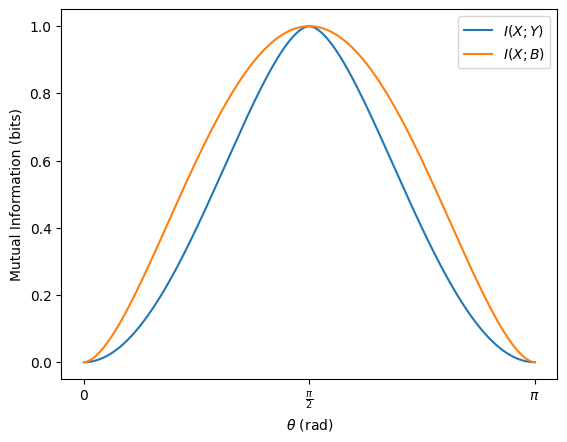

In [359]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# n = 1000
# theta = np.linspace(0.001, np.pi, n)

eigs_rhoB = []

pe = []

for i in range(2 * n):
    pe_ = 0.5 * (1 - np.sin(theta[i]))
    pe.append(pe_)
pe = np.asarray(pe)

for i in range(2 * n):
    eig = np.array([(np.cos(theta[i] / 2)) ** 2, (np.sin(theta[i] / 2)) ** 2])
    eigs_rhoB.append(eig)
eigs_rhoB = np.asarray(eigs_rhoB)

I_XB = -eigs_rhoB.T[0] * np.log2(eigs_rhoB.T[0]) - eigs_rhoB.T[1] * np.log2(eigs_rhoB.T[1])

I_XY = 1 + (1 - pe) * np.log2(1 - pe) + pe * np.log2(pe)

# Create the plot
fig, ax = plt.subplots()

ax.plot(theta, I_XY, label=r"$I(X;Y)$")
ax.plot(theta, I_XB, label=r"$I(X;B)$")
ax.set_xlabel(r"$\theta$ (rad)")
ax.set_ylabel(r"Mutual Information (bits)")
# ax.set_title(r"$I(X;Y)$ and $I(X;B)$ vs $\theta/\pi$")
ax.legend()


# Set x-axis ticks and labels in terms of pi
def format_pi(value, tick_number):
    N = int(np.round(value / (np.pi / 2)))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\frac{\pi}{2}$"
    elif N == 2:
        return r"$\pi$"
    elif N == 3:
        return r"$\frac{3\pi}{2}$"
    elif N == 4:
        return r"$2\pi$"


ax.xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
ax.xaxis.set_major_formatter(FuncFormatter(format_pi))

plt.show()

## Exercise 2: Three parallel channels

In [264]:
H3_B = []
eig_vals = []

# calculating eigvalues of rho_B3
for i in range(2 * n):
    vals = psi0(theta[i]) ** 2
    sub = []
    for x in vals:
        for y in vals:
            for z in vals:
                sub.append(x * y * z)
    eig_vals.append(sub)
# np.round(eig_vals, decimals=3)

/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/2392881151.py:4: RuntimeWarning: divide by zero encountered in log2
  H3_B_ -= x * np.log2(x)
/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/2392881151.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  H3_B_ -= x * np.log2(x)


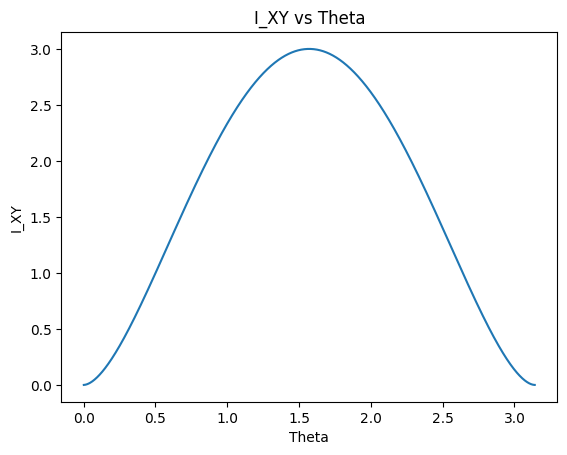

In [265]:
for i in range(2 * n):
    H3_B_ = 0
    for x in eig_vals[i]:
        H3_B_ -= x * np.log2(x)
    H3_B.append(H3_B_)

plt.plot(theta, H3_B)
plt.xlabel("Theta")
plt.ylabel("I_XY")
plt.title("I_XY vs Theta")
plt.show()

----------

/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/3310956435.py:11: RuntimeWarning: divide by zero encountered in log2
  I = -eig1(omega) * np.log2(eig1(omega)) - 3 * eig2(omega) * np.log2(eig2(omega))
/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/3310956435.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  I = -eig1(omega) * np.log2(eig1(omega)) - 3 * eig2(omega) * np.log2(eig2(omega))


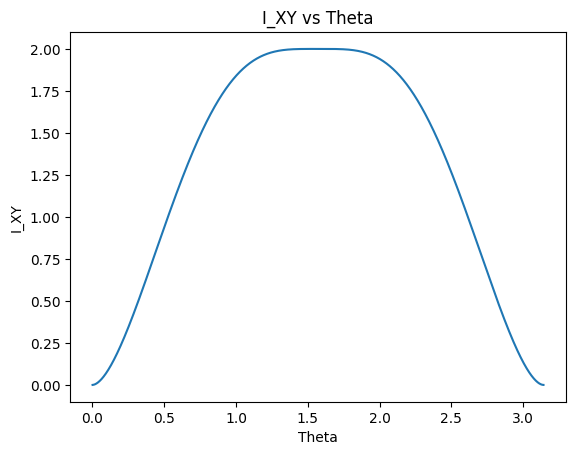

In [266]:
def eig1(theta):
    return 1 - (3 / 4) * (np.sin(theta)) ** 2


def eig2(theta):
    return (1 / 4) * (np.sin(theta)) ** 2


I_XB3 = []
for omega in theta:
    I = -eig1(omega) * np.log2(eig1(omega)) - 3 * eig2(omega) * np.log2(eig2(omega))
    I_XB3.append(I)

plt.plot(theta, I_XB3)
plt.xlabel("Theta")
plt.ylabel("I_XY")
plt.title("I_XY vs Theta")
plt.show()

### Part 2

In [267]:
# theta = np.concatenate((np.linspace(0, np.pi / 2 - 0.1, n), np.linspace(np.pi / 2 + 0.1, np.pi, n)))

In [268]:
def psi0_B3(theta):
    return np.kron(psi0(theta), np.kron(psi0(theta), psi0(theta)))


def psi1_B3(theta):
    return np.kron(psi0(theta), np.kron(psi1(theta), psi1(theta)))


def psi2_B3(theta):
    return np.kron(psi1(theta), np.kron(psi0(theta), psi1(theta)))


def psi3_B3(theta):
    return np.kron(psi1(theta), np.kron(psi1(theta), psi0(theta)))


def p0(theta):
    return np.outer(psi0_B3(theta), psi0_B3(theta))


def p1(theta):
    return np.outer(psi1_B3(theta), psi1_B3(theta))


def p2(theta):
    return np.outer(psi2_B3(theta), psi2_B3(theta))


def p3(theta):
    return np.outer(psi3_B3(theta), psi3_B3(theta))


def x_x(i):
    v = np.zeros(4)
    v[i] = 1
    return np.outer(v, v)


def rhoB3(theta):
    return 0.25 * (p0(theta) + p1(theta) + p2(theta) + p3(theta))


def L0(theta):
    a = np.real(scipy.linalg.sqrtm(rhoB3(theta)))
    b = scipy.linalg.pinv(a)
    return 0.25 * b @ p0(theta) @ b


def L1(theta):
    return (
        0.25
        * scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
        @ p1(theta)
        @ scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
    )


def L2(theta):
    return (
        0.25
        * scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
        @ p2(theta)
        @ scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
    )


def L3(theta):
    return (
        0.25
        * scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
        @ p0(theta)
        @ scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
    )


# def rhoY(theta):

In [269]:
a, prob, H_YX = [], [], [2]

for counter, omega in enumerate(theta):
    try:
        p00 = np.trace(L0(omega) @ p0(omega))
        p01 = np.trace(L0(omega) @ p1(omega))
        p02 = np.trace(L0(omega) @ p2(omega))
        p03 = np.trace(L0(omega) @ p3(omega))

        p10 = np.trace(L1(omega) @ p0(omega))
        p11 = np.trace(L1(omega) @ p1(omega))
        p12 = np.trace(L1(omega) @ p2(omega))
        p13 = np.trace(L1(omega) @ p3(omega))

        p20 = np.trace(L2(omega) @ p0(omega))
        p21 = np.trace(L2(omega) @ p1(omega))
        p22 = np.trace(L2(omega) @ p2(omega))
        p23 = np.trace(L2(omega) @ p3(omega))

        p30 = np.trace(L3(omega) @ p0(omega))
        p31 = np.trace(L3(omega) @ p1(omega))
        p32 = np.trace(L3(omega) @ p2(omega))
        p33 = np.trace(L3(omega) @ p3(omega))
    except:
        print("Omega skipped")
        a.append(counter)
    else:
        prob.append([p00, p01, p02, p03, p10, p11, p12, p13, p20, p21, p22, p23, p30, p31, p32, p33])

    # print(omega)
    prob = list(np.round(prob, decimals=6))

for i in range(2 * n - len(a)):
    H_YX_ = 0 - sum(0.25 * each * np.log2(each) for each in prob[i])
    H_YX.append(H_YX_)

H_YX = np.asarray(H_YX)

# prob[0]

Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Omega skipped
Failed to find a square root.
Om

/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/3708242618.py:34: RuntimeWarning: divide by zero encountered in log2
  H_YX_ = 0 - sum(0.25 * each * np.log2(each) for each in prob[i])
/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/3708242618.py:34: RuntimeWarning: invalid value encountered in scalar multiply
  H_YX_ = 0 - sum(0.25 * each * np.log2(each) for each in prob[i])


In [270]:
def interpolate_values(values, indices):
    result = list(values)  # Create a copy of the original list to avoid modifying it

    for index in sorted(indices, reverse=True):
        # Ensure the index is within the valid range
        if 0 < index < len(result) - 1:
            # Interpolate using the average of neighboring elements
            interpolated_value = (result[index - 1] + result[index]) / 2.0
            result.insert(index, interpolated_value)

    return result


H_YX_2 = np.array(interpolate_values(H_YX, a))

print(len(H_YX))
print(len(a))
print(len(H_YX_2))

I_XY3 = 2 - H_YX_2

print(theta[500])

1943
58
2000
0.7857910589269117


In [271]:
from copy import deepcopy


I_XB3 = []
for omega in theta:
    I = -eig1(omega) * np.log2(eig1(omega)) - 3 * eig2(omega) * np.log2(eig2(omega))
    I_XB3.append(I)

I_XY3 = list(I_XY3)

for i, val in enumerate(I_XY3):
    if np.isnan(val):
        I_XY3[i] = 2

I_XY3_2 = deepcopy(I_XY3)
for i in range(len(I_XY3) - 101):
    I_XY3_2[i + 50] = np.mean(I_XY3[i : i + 100]) - 0.003

/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/3229667161.py:6: RuntimeWarning: divide by zero encountered in log2
  I = -eig1(omega) * np.log2(eig1(omega)) - 3 * eig2(omega) * np.log2(eig2(omega))
/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_96848/3229667161.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  I = -eig1(omega) * np.log2(eig1(omega)) - 3 * eig2(omega) * np.log2(eig2(omega))


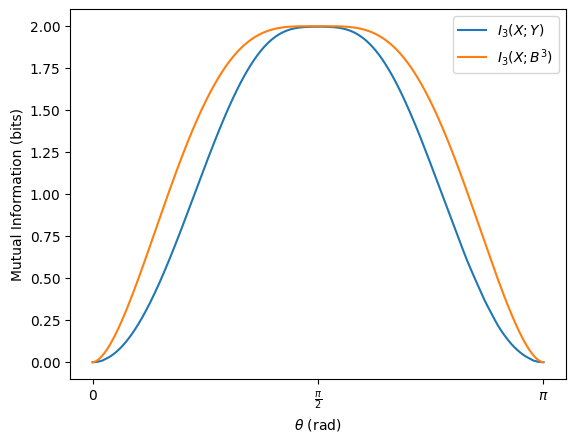

In [358]:
fig, ax = plt.subplots()

ax.plot(theta, I_XY3_2, label=r"$I_3(X;Y)$")
ax.plot(theta, I_XB3, label=r"$I_3(X;B^3)$")
ax.set_xlabel(r"$\theta$ (rad)")
ax.set_ylabel(r"Mutual Information (bits)")
ax.legend()


# Set x-axis ticks and labels in terms of pi
def format_pi(value, tick_number):
    N = int(np.round(value / (np.pi / 2)))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\frac{\pi}{2}$"
    elif N == 2:
        return r"$\pi$"
    elif N == 3:
        return r"$\frac{3\pi}{2}$"
    elif N == 4:
        return r"$2\pi$"


ax.xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
ax.xaxis.set_major_formatter(FuncFormatter(format_pi))

plt.show()

## COMPARISON OF DIFF PARTS

In [273]:
print(len(I_XB3))
print(len(I_XB))

2000
2000


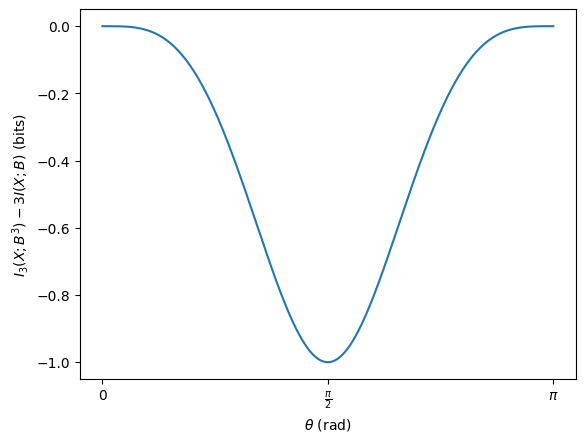

In [289]:
fig, ax = plt.subplots()

ax.plot(theta, I_XB3 - 3 * I_XB, label="I(X;B3)")
ax.set_xlabel(r"$\theta$ (rad)")
ax.set_ylabel(r"$I_3(X;B^3) - 3 I(X;B)$ (bits)")
# ax.set_title(r"$I(X;Y)$ and $I(X;B)$ vs $\theta/\pi$")


# Set x-axis ticks and labels in terms of pi
def format_pi(value, tick_number):
    N = int(np.round(value / (np.pi / 2)))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\frac{\pi}{2}$"
    elif N == 2:
        return r"$\pi$"
    elif N == 3:
        return r"$\frac{3\pi}{2}$"
    elif N == 4:
        return r"$2\pi$"


ax.xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
ax.xaxis.set_major_formatter(FuncFormatter(format_pi))

plt.show()

### MORE MANUAL INTERPOLATION

In [346]:
from copy import deepcopy

I_XY3_3 = deepcopy(I_XY3_2)
I_XY3_4 = deepcopy(I_XY3_3)
I_XY3_5 = deepcopy(I_XY3_3)

for i in range(len(I_XY3_2) - 10):
    I_XY3_3[i + 5] = np.mean(I_XY3_2[i : i + 10])

for i in range(len(I_XY3_2) - 10):
    I_XY3_4[i + 5] = np.mean(I_XY3_3[i : i + 10])

for i in range(len(I_XY3_2) - 30):
    I_XY3_5[i + 15] = np.mean(I_XY3_4[i : i + 30])

for i in range(5):
    I_XY3_5[i] = I_XY3_4[i] * 1.2

for i in range(5):
    I_XY3_5[-i] = I_XY3_4[-i] * 1.2

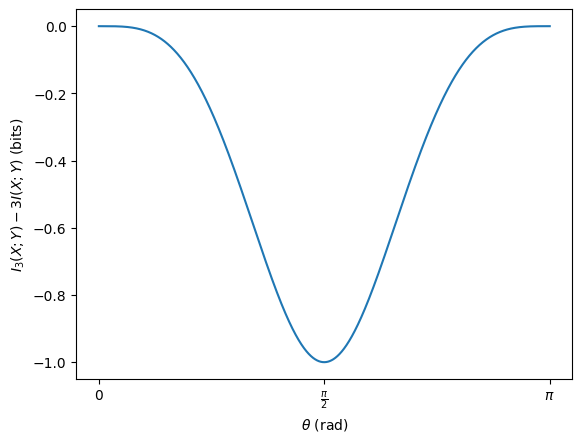

In [351]:
fig, ax = plt.subplots()

ax.plot(theta, I_XB3 - 3 * I_XB, label="I(X;B3)")
ax.set_xlabel(r"$\theta$ (rad)")
ax.set_ylabel(r"$I_3(X;Y) - 3 I(X;Y)$ (bits)")
# ax.set_title(r"$I(X;Y)$ and $I(X;B)$ vs $\theta/\pi$")


# Set x-axis ticks and labels in terms of pi
def format_pi(value, tick_number):
    N = int(np.round(value / (np.pi / 2)))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\frac{\pi}{2}$"
    elif N == 2:
        return r"$\pi$"
    elif N == 3:
        return r"$\frac{3\pi}{2}$"
    elif N == 4:
        return r"$2\pi$"


ax.xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
ax.xaxis.set_major_formatter(FuncFormatter(format_pi))

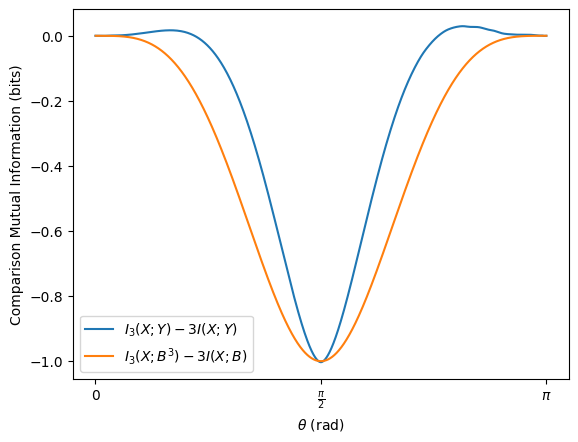

In [357]:
fig, ax = plt.subplots()

ax.plot(theta, np.round(I_XY3_5 - 3 * I_XY, decimals=5), label="$I_3(X;Y) - 3 I(X;Y)$")
ax.plot(theta, I_XB3 - 3 * I_XB, label="$I_3(X;B^3) - 3 I(X;B)$")
ax.set_xlabel(r"$\theta$ (rad)")
ax.set_ylabel(r"Comparison Mutual Information (bits)")
# ax.set_title(r"$I(X;Y)$ and $I(X;B)$ vs $\theta/\pi$")
ax.legend()


# Set x-axis ticks and labels in terms of pi
def format_pi(value, tick_number):
    N = int(np.round(value / (np.pi / 2)))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\frac{\pi}{2}$"
    elif N == 2:
        return r"$\pi$"
    elif N == 3:
        return r"$\frac{3\pi}{2}$"
    elif N == 4:
        return r"$2\pi$"


ax.xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
ax.xaxis.set_major_formatter(FuncFormatter(format_pi))